## Telecom Churn Prediction

_By:_ **Shayak Majumder** | **Satya Ranjan** | **Syed MD Umar Zayed**

**Note:** For easier referencing, most comments and noteworthy observations are written in markdown cells.
<br> In-line comments will be added with #s, as usual..

In [1]:
#Let's begin by disabling warnings so that we don't face too many of them during coding.

import warnings
warnings.filterwarnings('ignore')

Now, let's import the necessary libraries. 
<br> We will keep adding further libraries here, like sklearn or others, as and when we need them.
<br> This way, all libraries and modules will be kept in one cell in a clean manner. 

In [89]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

To see columns easily, let's set max columns for display.

In [3]:
pd.set_option('display.max_columns', 500)

## Now, let's Read the Data & handled Missing values & Outliers

In [4]:
pwd

'C:\\Users\\shayakm'

In [5]:
tel_df = pd.read_csv('C:\\Users\\shayakm\\downloads\\telecom_churn_data.csv')
tel_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
#Let's check shape of the dataset

tel_df.shape

(99999, 226)

That's a sizeable dataset! Let's quickly check out the info and statistical description.

In [7]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
tel_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Alright, so let's start with one of the most vital steps of cleaning data: **Handling Missing Values** 

In [9]:
# Check % of missing values in columns

tel_df_mis_col = (round(((tel_df.isnull().sum()/len(tel_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_df_mis_col

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


Let's go ahead and **drop columns with over 30% missing values** as they won't help us at all.

In [10]:
col_list_missing_30 = list(tel_df_mis_col.index[tel_df_mis_col['null'] > 30])
tel_df = tel_df.drop(col_list_missing_30, axis=1)
tel_df.shape

(99999, 186)

Okay, so we were able to drop 40 columns with very high missing values.

Now, let's go ahead and **drop a couple of unnecessary columns**, like date and circle_id.
<br> Date details are not necessary for us to predict churn for month 9.
<br> Also, telecom circle area won't matter to us much.

In [11]:
#First, let's collect all date columns together

dates = [i for i in tel_df.columns.to_list() if 'date' in i]

#Now, dropping dates

tel_df = tel_df.drop(dates, axis=1)

#Check if it worked

tel_df.shape

(99999, 178)

In [12]:
#Now, let's drop circle_id column

tel_df = tel_df.drop('circle_id', axis = 1)

#Let's check

tel_df.shape

(99999, 177)

## Finding High-Value Customers

We should now **filter out high-value customers**, which is the **70th percentile of the avg recharge amount in the first two months**.
<br>We can do this by **first taking an average of total recharge amount of month 6 and 7**, then **finding 70th percentile**.
<br>Then, we can **filter out** the customers above that percentile.

In [13]:
# First, let's create a new column with average of recharge amount

tel_df['average_rech_amt_6_7'] = (tel_df['total_rech_amt_6'] + tel_df['total_rech_amt_7'])/2

#Now, let's find the 70th percentile

perc_70 = tel_df['average_rech_amt_6_7'].quantile(0.7)

perc_70

368.5

In [14]:
#Finally, let's filter the 70th-percentile customers

tel_df = tel_df[tel_df['average_rech_amt_6_7'] >= perc_70]

#Let's check if that worked

tel_df.shape

(30011, 178)

**Note:** As expected, we are getting a little over 30,000 rows of data. Guess we're on the right path then!

Now, we should deal with missing values in this batch of data.
<br> Let's drop rows with over 50% missing values.

In [15]:
#First, let's collect all columns with over 50% missing values in one place

tel_df_missing_50 = tel_df[(tel_df.isnull().sum(axis=1)) > (len(tel_df.columns)//2)]

#Now, let's drop them

tel_df = tel_df.drop(tel_df_missing_50.index)

# Let's check the shape now

tel_df.shape

(29897, 178)

Now, let's go ahead and check the missing values to see where we stand.



In [16]:
tel_df_mis_col_1 = (round(((tel_df.isnull().sum()/len(tel_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_df_mis_col_1

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


From what we can see, the minutes of usage (MOU) for the 9th month, i.e. September, appear to have missing values.
<br>We can list them together and then drop them.

In [17]:
#First, let's create the list

((tel_df_mis_col_1[tel_df_mis_col_1['null'] == 5.32]).index).to_list()

['loc_ic_mou_9',
 'og_others_9',
 'loc_og_t2t_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2m_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'roam_og_mou_9',
 'std_ic_t2o_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'spl_og_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_mou_9',
 'onnet_mou_9',
 'spl_ic_mou_9',
 'ic_others_9',
 'isd_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'offnet_mou_9',
 'loc_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'roam_ic_mou_9']

In [18]:
#Now, we can create a dataframe taking only the null values of columns with 'mou_9'

tel_df_mou_9_null = tel_df[(tel_df['loc_og_t2m_mou_9'].isnull()) & (tel_df['loc_ic_t2f_mou_9'].isnull()) & (tel_df['roam_og_mou_9'].isnull()) & (tel_df['std_ic_t2m_mou_9'].isnull()) &
  (tel_df['loc_og_t2t_mou_9'].isnull()) & (tel_df['std_ic_t2t_mou_9'].isnull()) & (tel_df['loc_og_t2f_mou_9'].isnull()) & (tel_df['loc_ic_mou_9'].isnull()) &
  (tel_df['loc_og_t2c_mou_9'].isnull()) & (tel_df['loc_og_mou_9'].isnull()) & (tel_df['std_og_t2t_mou_9'].isnull()) & (tel_df['roam_ic_mou_9'].isnull()) &
  (tel_df['loc_ic_t2m_mou_9'].isnull()) & (tel_df['std_og_t2m_mou_9'].isnull()) & (tel_df['loc_ic_t2t_mou_9'].isnull()) & (tel_df['std_og_t2f_mou_9'].isnull()) & 
  (tel_df['std_og_t2c_mou_9'].isnull()) & (tel_df['og_others_9'].isnull()) & (tel_df['std_og_mou_9'].isnull()) & (tel_df['spl_og_mou_9'].isnull()) & 
  (tel_df['std_ic_t2f_mou_9'].isnull()) & (tel_df['isd_og_mou_9'].isnull()) & (tel_df['std_ic_mou_9'].isnull()) & (tel_df['offnet_mou_9'].isnull()) & 
  (tel_df['isd_ic_mou_9'].isnull()) & (tel_df['ic_others_9'].isnull()) & (tel_df['std_ic_t2o_mou_9'].isnull()) & (tel_df['onnet_mou_9'].isnull()) & 
  (tel_df['spl_ic_mou_9'].isnull())]

tel_df_mou_9_null.shape

(1590, 178)

In [19]:
#Now, we can drop them

tel_df = tel_df.drop(tel_df_mou_9_null.index)

tel_df.shape

(28307, 178)

Now, we will **continue the entire process** of checking for null values, listing them, and then dropping them until we have dealt with all null values in our dataset.

In [20]:
#Checking null percentage once again

tel_df_mis_col_1 = (round(((tel_df.isnull().sum()/len(tel_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_df_mis_col_1

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


In [21]:
#Listing MOUs for 8th month (with 0.55 null values)

((tel_df_mis_col_1[tel_df_mis_col_1['null'] == 0.55]).index).to_list()

['isd_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_mou_8',
 'std_ic_t2o_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'spl_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2f_mou_8',
 'spl_ic_mou_8',
 'std_ic_mou_8',
 'offnet_mou_8',
 'ic_others_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'onnet_mou_8',
 'isd_ic_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8']

In [22]:
#Now, creating a dataframe taking only the null values of columns with 'mou_8'

tel_df_mou_8_null = tel_df[(tel_df['loc_og_t2m_mou_8'].isnull()) & (tel_df['loc_ic_t2f_mou_8'].isnull()) & (tel_df['roam_og_mou_8'].isnull()) & (tel_df['std_ic_t2m_mou_8'].isnull()) &
  (tel_df['loc_og_t2t_mou_8'].isnull()) & (tel_df['std_ic_t2t_mou_8'].isnull()) & (tel_df['loc_og_t2f_mou_8'].isnull()) & (tel_df['loc_ic_mou_8'].isnull()) &
  (tel_df['loc_og_t2c_mou_8'].isnull()) & (tel_df['loc_og_mou_8'].isnull()) & (tel_df['std_og_t2t_mou_8'].isnull()) & (tel_df['roam_ic_mou_8'].isnull()) &
  (tel_df['loc_ic_t2m_mou_8'].isnull()) & (tel_df['std_og_t2m_mou_8'].isnull()) & (tel_df['loc_ic_t2t_mou_8'].isnull()) & (tel_df['std_og_t2f_mou_8'].isnull()) & 
  (tel_df['std_og_t2c_mou_8'].isnull()) & (tel_df['og_others_8'].isnull()) & (tel_df['std_og_mou_8'].isnull()) & (tel_df['spl_og_mou_8'].isnull()) & 
  (tel_df['std_ic_t2f_mou_8'].isnull()) & (tel_df['isd_og_mou_8'].isnull()) & (tel_df['std_ic_mou_8'].isnull()) & (tel_df['offnet_mou_8'].isnull()) & 
  (tel_df['isd_ic_mou_8'].isnull()) & (tel_df['ic_others_8'].isnull()) & (tel_df['std_ic_t2o_mou_8'].isnull()) & (tel_df['onnet_mou_8'].isnull()) & 
  (tel_df['spl_ic_mou_8'].isnull())]

#Now, let's drop them

tel_df = tel_df.drop(tel_df_mou_8_null.index)

In [23]:
#Let's check for null values again

tel_df_mis_col_1 = (round(((tel_df.isnull().sum()/len(tel_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_df_mis_col_1

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


In [24]:
#Listing MOUs for 6th month (with 0.44 null values)

((tel_df_mis_col_1[tel_df_mis_col_1['null'] == 0.44]).index).to_list()

['roam_ic_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2c_mou_6',
 'loc_ic_t2m_mou_6',
 'isd_og_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'ic_others_6',
 'roam_og_mou_6',
 'loc_ic_mou_6',
 'std_og_mou_6',
 'loc_og_t2f_mou_6',
 'isd_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_mou_6',
 'std_og_t2t_mou_6',
 'std_ic_t2o_mou_6',
 'std_og_t2f_mou_6',
 'std_ic_t2f_mou_6',
 'spl_ic_mou_6',
 'onnet_mou_6',
 'std_og_t2c_mou_6',
 'std_ic_t2m_mou_6',
 'offnet_mou_6',
 'loc_og_mou_6']

In [25]:
#Now, creating a dataframe taking only the null values of columns with 'mou_8'

tel_df_mou_6_null = tel_df[(tel_df['loc_og_t2m_mou_6'].isnull()) & (tel_df['loc_ic_t2f_mou_6'].isnull()) & (tel_df['roam_og_mou_6'].isnull()) & (tel_df['std_ic_t2m_mou_6'].isnull()) &
  (tel_df['loc_og_t2t_mou_6'].isnull()) & (tel_df['std_ic_t2t_mou_6'].isnull()) & (tel_df['loc_og_t2f_mou_6'].isnull()) & (tel_df['loc_ic_mou_6'].isnull()) &
  (tel_df['loc_og_t2c_mou_6'].isnull()) & (tel_df['loc_og_mou_6'].isnull()) & (tel_df['std_og_t2t_mou_6'].isnull()) & (tel_df['roam_ic_mou_6'].isnull()) &
  (tel_df['loc_ic_t2m_mou_6'].isnull()) & (tel_df['std_og_t2m_mou_6'].isnull()) & (tel_df['loc_ic_t2t_mou_6'].isnull()) & (tel_df['std_og_t2f_mou_6'].isnull()) & 
  (tel_df['std_og_t2c_mou_6'].isnull()) & (tel_df['og_others_6'].isnull()) & (tel_df['std_og_mou_6'].isnull()) & (tel_df['spl_og_mou_6'].isnull()) & 
  (tel_df['std_ic_t2f_mou_6'].isnull()) & (tel_df['isd_og_mou_6'].isnull()) & (tel_df['std_ic_mou_6'].isnull()) & (tel_df['offnet_mou_6'].isnull()) & 
  (tel_df['isd_ic_mou_6'].isnull()) & (tel_df['ic_others_6'].isnull()) & (tel_df['std_ic_t2o_mou_6'].isnull()) & (tel_df['onnet_mou_6'].isnull()) & 
  (tel_df['spl_ic_mou_6'].isnull())]

#Now, let's drop them

tel_df = tel_df.drop(tel_df_mou_6_null.index)

In [26]:
#Let's check for null values again

tel_df_mis_col_1 = (round(((tel_df.isnull().sum()/len(tel_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_df_mis_col_1

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


In [27]:
#Listing MOUs for 7th month (with 0.12 null values)

((tel_df_mis_col_1[tel_df_mis_col_1['null'] == 0.12]).index).to_list()

['loc_ic_t2f_mou_7',
 'isd_ic_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'ic_others_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'loc_og_t2t_mou_7',
 'og_others_7',
 'spl_ic_mou_7',
 'loc_ic_t2t_mou_7',
 'std_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'std_og_t2m_mou_7',
 'std_ic_t2m_mou_7',
 'roam_ic_mou_7',
 'onnet_mou_7',
 'roam_og_mou_7',
 'offnet_mou_7']

In [28]:
#Now, creating a dataframe taking only the null values of columns with 'mou_7'

tel_df_mou_7_null = tel_df[(tel_df['loc_og_t2m_mou_7'].isnull()) & (tel_df['loc_ic_t2f_mou_7'].isnull()) & (tel_df['roam_og_mou_7'].isnull()) & (tel_df['std_ic_t2m_mou_7'].isnull()) &
  (tel_df['loc_og_t2t_mou_7'].isnull()) & (tel_df['std_ic_t2t_mou_7'].isnull()) & (tel_df['loc_og_t2f_mou_7'].isnull()) & (tel_df['loc_ic_mou_7'].isnull()) &
  (tel_df['loc_og_t2c_mou_7'].isnull()) & (tel_df['loc_og_mou_7'].isnull()) & (tel_df['std_og_t2t_mou_7'].isnull()) & (tel_df['roam_ic_mou_7'].isnull()) &
  (tel_df['loc_ic_t2m_mou_7'].isnull()) & (tel_df['std_og_t2m_mou_7'].isnull()) & (tel_df['loc_ic_t2t_mou_7'].isnull()) & (tel_df['std_og_t2f_mou_7'].isnull()) & 
  (tel_df['std_og_t2c_mou_7'].isnull()) & (tel_df['og_others_7'].isnull()) & (tel_df['std_og_mou_7'].isnull()) & (tel_df['spl_og_mou_7'].isnull()) & 
  (tel_df['std_ic_t2f_mou_7'].isnull()) & (tel_df['isd_og_mou_7'].isnull()) & (tel_df['std_ic_mou_7'].isnull()) & (tel_df['offnet_mou_7'].isnull()) & 
  (tel_df['isd_ic_mou_7'].isnull()) & (tel_df['ic_others_7'].isnull()) & (tel_df['std_ic_t2o_mou_7'].isnull()) & (tel_df['onnet_mou_7'].isnull()) & 
  (tel_df['spl_ic_mou_7'].isnull())]

#Now, let's drop them

tel_df = tel_df.drop(tel_df_mou_7_null.index)

In [29]:
#Let's check for null values again

tel_df_mis_col_1 = (round(((tel_df.isnull().sum()/len(tel_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tel_df_mis_col_1

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


Alright! We have dealt with all the null values in our dataset.

In [30]:
#Let's check the shape

tel_df.shape

(27991, 178)

## Now, Let's deal with Churners!

To begin, we can first tag churned customers.
<br> Customers who have **no incoming or outgoing** & have **not used Internet** once in the churn phase will be our focus now.
<br> We'll mark those who churned as 1, and others as 0.

In [31]:
tel_df['churn'] = np.where((tel_df['total_ic_mou_9'] == 0) & (tel_df['total_og_mou_9'] == 0) & (tel_df['vol_2g_mb_9'] == 0) & (tel_df['vol_3g_mb_9'] == 0), 1, 0)


In [32]:
#Let's check if this worked

tel_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4

It worked! We now have a dedicated 'churn' column

Now, let's **drop** all attributes/rows that corresponds with the churn phase, i.e. '_9' in column names.

In [33]:
col_drop_9 = [i for i in tel_df.columns.to_list() if '_9' in i]
col_drop_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [34]:
#Let's drop them now

tel_df = tel_df.drop(col_drop_9, axis = 1)

#Let's check if that worked

tel_df.shape

(27991, 137)

## Now, let's handle Outliers!

In [35]:
#First, let's see the information

tel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27991 entries, 8 to 99997
Columns: 137 entries, mobile_number to churn
dtypes: float64(110), int32(1), int64(26)
memory usage: 29.4 MB


In [36]:
print(tel_df.dtypes)

mobile_number             int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
arpu_6                  float64
                         ...   
jul_vbc_3g              float64
jun_vbc_3g              float64
sep_vbc_3g              float64
average_rech_amt_6_7    float64
churn                     int32
Length: 137, dtype: object


In [37]:
tel_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0

So, as we can see, the columns of 'mobile number' and 'churn' are numerical. 
<br>We should **convert them to objects** so that they don't interfere with our EDA.
<br>Also, we need to **drop sep_vbc_3g column**, since we removed all other churn phase columns.

In [38]:
# Dropping sep_vbc_3g

tel_df = tel_df.drop('sep_vbc_3g', axis=1)

In [39]:
# Converting mobile number and churn

tel_df['mobile_number'] = tel_df['mobile_number'].astype(object)
tel_df['churn'] = tel_df['churn'].astype(object)

Now, we can create a list of numberical columns only. 
<br> Then, we can remove outliers below 10th and 90th percentile

In [40]:
# Creating a list of numerical columns

num_col = tel_df.select_dtypes(exclude = ['object']).columns
num_col

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'average_rech_amt_6_7'],
      dtype='object', length=134)

In [41]:
#Now, writing For loop to handle 10th and 90th percentiles. Will assing to tel_df_fin

for i in num_col: 
    q_1 = tel_df[i].quantile(0.10)
    q_3 = tel_df[i].quantile(0.90)
    iqr = q_3 - q_1
    low_range  = q_1 - 1.5 * iqr
    high_range = q_3 + 1.5 * iqr
    tel_df_fin = tel_df.loc[(tel_df[i] > low_range) & (tel_df[i] < high_range)]

#Checking shape to see if this worked

tel_df_fin.shape

(27705, 136)

## Now, time for EDA!

But first, to help in better EDA visalisation, we can **club** some of the 'total' columns to create 'decereased action' columns.

In [42]:
#First, let's check the columns with 'total' and 'mou' data in them

[i for i in tel_df_fin.columns.to_list() if 'total' in i]


['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

Okay, now let's create a new column to see if MOU for a customer has decreased in the 'action' phase

In [43]:
#First, let's calculate the total mou in the 'good' phase, by summing outgoing and incoming activity.

tel_df_fin['good_total_mou'] = (tel_df_fin['total_og_mou_6'] + tel_df_fin['total_ic_mou_6'])

#Now, let's take average of month 7 and month 8 of mou, which is the 'action' phase

tel_df_fin['action_avg_mou'] = (tel_df_fin['total_og_mou_7'] + tel_df_fin['total_og_mou_8'] + tel_df_fin['total_ic_mou_7'] + tel_df_fin['total_ic_mou_8'])/2

#Now, let's find the difference between action_avg_mou and good_total_mou

tel_df_fin['mou_difference'] = tel_df_fin['action_avg_mou'] - tel_df_fin['good_total_mou']

#Lastly, let's add a column to check decrease in mou, marked by 1 or 0

tel_df_fin['mou_action_decrease'] = np.where((tel_df_fin['mou_difference'] < 0), 1, 0)

#Let's check if this worked

tel_df_fin.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,churn,good_total_mou,action_avg_mou,mou_difference,mou_action_decrease
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,

Okay, so this worked! Now we have a dedicated column for decrease in mou for 'action' phase
<br> Let's follow a similar approach for decrease in recharge (both number and amount), decrease in arpu, and decrease in volume as they are important factors for any telco. 

Let's start with decrease in number of reacharge during 'action' phase.

In [44]:
#Let's take the average of recharge number in month 7 and month 8

tel_df_fin['action_avg_rech_num'] = (tel_df_fin['total_rech_num_7'] + tel_df_fin['total_rech_num_8'])/2

#Now, let's find the difference between action_avg_rech_num and total recharge number for month 6

tel_df_fin['difference_rech_num'] = tel_df_fin['action_avg_rech_num'] - tel_df_fin['total_rech_num_6']

#Now, let's add a column following the same 1 and 0 funda as earlier

tel_df_fin['rech_num_action_decrease'] = np.where((tel_df_fin['difference_rech_num'] < 0), 1, 0)

#Finally, let's check 

tel_df_fin.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,churn,good_total_mou,action_avg_mou,mou_difference,mou_action_decrease,action_avg_rech_num,difference_rech_num,rech_num_action_decrease
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.

This worked! We now have a column 'rech_num_action_decrease' that marks decrease in action phase.
<br> Let's move on to decreased in recharge amount

In [45]:
#Let's start by finding the average recharge amount in 'action' phase

tel_df_fin['action_avg_rech_amt'] = (tel_df_fin['total_rech_amt_7'] + tel_df_fin['total_rech_amt_8'])/2

#Now, let's find the difference

tel_df_fin['difference_rech_amt'] = tel_df_fin['action_avg_rech_amt'] - tel_df_fin['total_rech_amt_6']

#Now, let's add a column, following similar 1 and 0 funda to mark decrease or not

tel_df_fin['rech_amt_action_decrease'] = np.where((tel_df_fin['difference_rech_amt'] < 0), 1, 0)

#Let's check 

tel_df_fin.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,churn,good_total_mou,action_avg_mou,mou_difference,mou_action_decrease,action_avg_rech_num,difference_rech_num,rech_num_action_decrease,action_avg_rech_amt,difference_rech_amt,rech_amt_action_decrease
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.

We now have a column to see if amoung of recharge decreased for 'action' phase.
<br> Let's now move on to decrease in average revenue per user, or arpu, during 'action' phase.                                                        

In [46]:
#Let's begin by finding the average first, for month 7 and month 8

tel_df_fin['action_avg_arpu'] = (tel_df_fin['arpu_7'] + tel_df_fin['arpu_8'])/2

#Now, let's find the difference

tel_df_fin['difference_arpu'] = tel_df_fin['action_avg_arpu'] - tel_df_fin['arpu_6']

#Now, let's add a column following the same funda as earlier

tel_df_fin['arpu_action_decrease'] = np.where(tel_df_fin['difference_arpu'] < 0, 1, 0)

#Let's check

tel_df_fin.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,churn,good_total_mou,action_avg_mou,mou_difference,mou_action_decrease,action_avg_rech_num,difference_rech_num,rech_num_action_decrease,action_avg_rech_amt,difference_rech_amt,rech_amt_action_decrease,action_avg_arpu,difference_arpu,arpu_action_decrease
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,

We now have a dedicated column to see if arpu decreased during 'action' phase.
<br>Now, let's move on to volume based cost, or vbc, during 'action' phase.

In [47]:
#First, let's start with finding the average

tel_df_fin['action_avg_vbc_3g'] = (tel_df_fin['jul_vbc_3g'] + tel_df_fin['aug_vbc_3g'])/2

#Now, we can find the difference

tel_df_fin['difference_vbc'] = tel_df_fin['action_avg_vbc_3g'] - tel_df_fin['jun_vbc_3g']

#Now, let's add the column, following similar 1 and 0 funda to mark decrease or increase

tel_df_fin['vbc_action_decrease'] = np.where(tel_df_fin['difference_vbc'] < 0 , 1, 0)

#Finally, let's check

tel_df_fin.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,churn,good_total_mou,action_avg_mou,mou_difference,mou_action_decrease,action_avg_rech_num,difference_rech_num,rech_num_action_decrease,action_avg_rech_amt,difference_rech_amt,rech_amt_action_decrease,action_avg_arpu,difference_arpu,arpu_action_decrease,action_avg_vbc_3g,difference_vbc,vbc_action_decrease
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4

Okay, so we have a dedicate column to see vbc decrease for 'action' phase.
<br> These will help in our visualisation and easier understanding.

## Time for EDA!

We can start with **univariate analyses** of the target variable, **churn**, with decreases in mou, recharge number and amount, arpu, and vbc.

First, we will convert the churn column into int dtype so that we can take mean of the data to pivot table

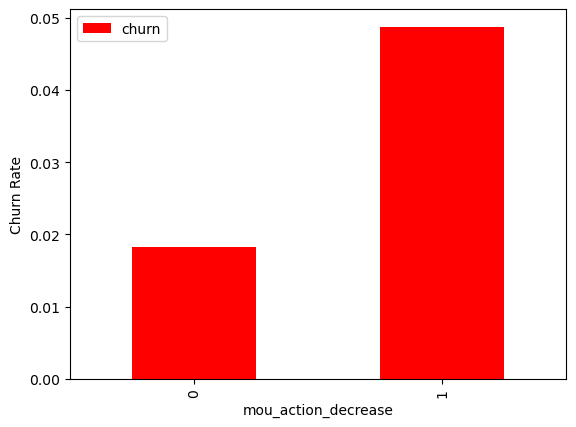

In [48]:
tel_df_fin.pivot_table(values = 'churn', index = 'mou_action_decrease', aggfunc = 'mean').plot.bar(color = 'red')
plt.ylabel('Churn Rate')
plt.show()

**Takeaway:** As we can see, the **Churn Rate** is **higher for customers who registered a decrease in minutes of usage (mou)** during the 'action' phase.

Will we see a similar trend for decrease in number of recharges? Let's find out!

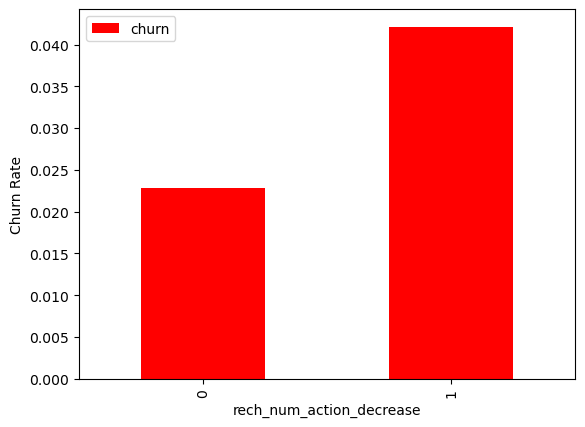

In [49]:
tel_df_fin.pivot_table(values = 'churn' , index = 'rech_num_action_decrease', aggfunc = 'mean').plot.bar(color = 'red')
plt.ylabel('Churn Rate')
plt.show()

**Takeaway:** As we can see, the **Churn Rate** is **higher for customers who registered a decrease in number of recharges** during the 'action' phase.
<br> Let's move on to decrease in recharge amount.

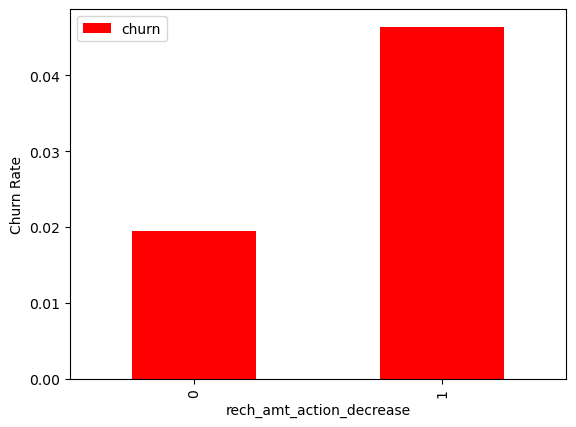

In [50]:
tel_df_fin.pivot_table(values = 'churn' , index = 'rech_amt_action_decrease', aggfunc = 'mean').plot.bar(color = 'red')
plt.ylabel('Churn Rate')
plt.show()

**Takeaway:** As we can see, the **Churn Rate** is **higher for customers who registered a decrease in recharge amount** during the 'action' phase.
<br> Let's move on to decrease in arpu.

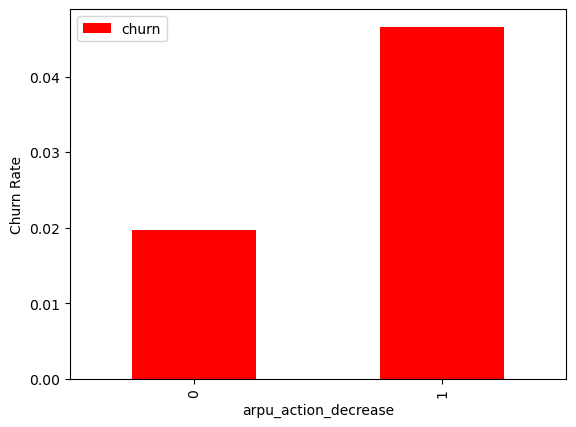

In [51]:
tel_df_fin.pivot_table(values = 'churn' , index = 'arpu_action_decrease', aggfunc = 'mean').plot.bar(color = 'red')
plt.ylabel('Churn Rate')
plt.show()

**Takeaway:** As we can see, the **Churn Rate** is **higher for customers who registered a decrease in arpu** during the 'action' phase.
<br> Let's move on to decrease in volume-based cost.

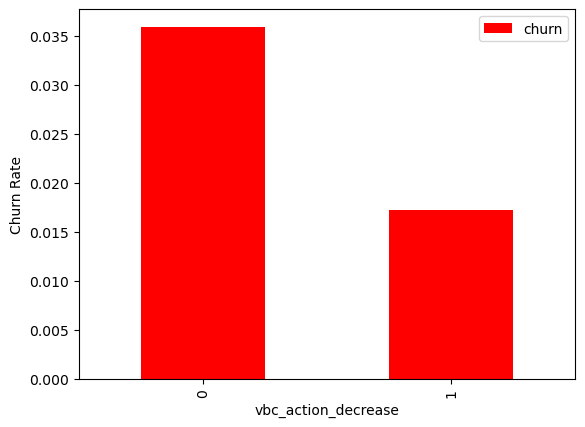

In [52]:
tel_df_fin.pivot_table(values = 'churn' , index = 'vbc_action_decrease', aggfunc = 'mean').plot.bar(color = 'red')
plt.ylabel('Churn Rate')
plt.show()

**Takeaway:** As expected, the ***Churn Rate* is much **lesser for customers who have actually seen an increase in volume based cost**.

Let's quickly take a look at the relationship between the average number of recharges and average amount of recharges during the 'action' phase.

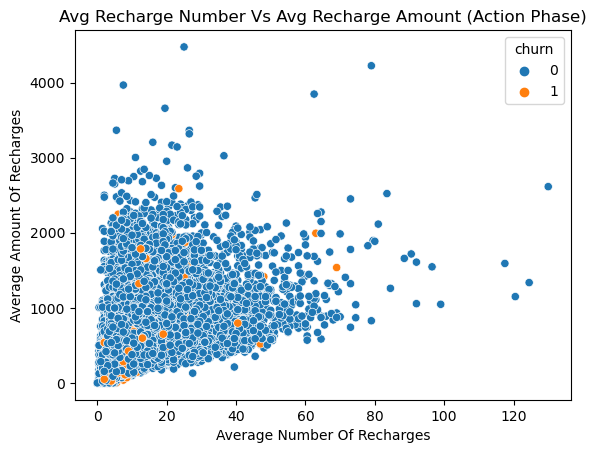

In [53]:
sns.scatterplot(x = 'action_avg_rech_num', y = 'action_avg_rech_amt', hue = 'churn', data = tel_df_fin)
plt.title('Avg Recharge Number Vs Avg Recharge Amount (Action Phase)')
plt.xlabel('Average Number Of Recharges')
plt.ylabel('Average Amount Of Recharges')
plt.show()

**Takeaway:** There are **more non-churners** than **churners**. 
<br> Users who **recharge more often tend to be non-churners**. Same goes for **users who recharge with more amount**.

## *Key Takeaways:*

1. **Higher** the **number of recharges**, **lesser** is the **Churn Rate**.
2. **Higher** the **amount of recharges**, **lesser** is the **Churn Rate**.
3. **Higher** the average revenue per user (**ARPU**), **lesser** is the **Churn Rate**.
4. **Higher** the volume-based cost (**VBC**), **lesser** is the **Churn Rate**.

Before we get into splitting our data for Train & Test, let's go ahead and drop some of the columns we created as they are not needed anymore.

In [54]:
tel_df_fin.drop(['good_total_mou', 'action_avg_mou', 'mou_difference', 'action_avg_rech_num', 'difference_rech_num', 'action_avg_rech_amt', 'difference_rech_amt', 'action_avg_arpu', 'difference_arpu', 'action_avg_vbc_3g', 'difference_vbc', 'average_rech_amt_6_7'], axis = 1)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,mou_action_decrease,rech_num_action_decrease,rech_amt_action_decrease,arpu_action_decrease,vbc_action_decrease
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,1,1,1,1,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,1,0,1,1,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,

## Now, Train-Test Split!

In [55]:
# First, we can put all feature variables into X

X = tel_df_fin.drop(['mobile_number', 'churn'], axis = 1)

# Now, we can put target variable to y

y = tel_df_fin['churn']

#Now, let's split the data 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

Since rate of churn is low, around 5-10%, we will go ahead and use **SMOTE technique to deal with data imbalance**.

In [56]:
# Using SMOTE

sm = SMOTE(sampling_strategy = 'auto', random_state = 27)

#Fitting SMOTE to train data

X_train, y_train = sm.fit_resample(X_train, y_train)

ValueError: Unknown label type: 'unknown'

In [57]:
#Let's address the error
#Let's first check the values and dtype of y_train

y_train.unique()

array([0, 1], dtype=object)

In [58]:
#To fix, converting dtype to int

y_train = y_train.astype(int)
y_train.unique()

array([0, 1])

In [59]:
y_train.dtype

dtype('int32')

In [60]:
#Now, let's try fitting SMOTE again

X_train, y_train = sm.fit_resample(X_train, y_train)

## Now, we can scale the Features!

In [61]:
# We will use StandardScaler for our features

scaler = StandardScaler()

In [62]:
# Let's list numeric columns in X_train
col_scale = X_train.columns.to_list()

# Let's remove the columbs we created
col_scale.remove('mou_action_decrease')
col_scale.remove('rech_num_action_decrease')
col_scale.remove('rech_amt_action_decrease')
col_scale.remove('arpu_action_decrease')
col_scale.remove('vbc_action_decrease')

#Now, let's fit the data and transform

X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

In [63]:
#Let's check if that worked

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,good_total_mou,action_avg_mou,mou_difference,mou_action_decrease,action_avg_rech_num,difference_rech_num,rech_num_action_decrease,action_avg_rech_amt,difference_rech_amt,rech_amt_action_decrease,action_avg_arpu,difference_arpu,arpu_action_decrease,action_avg_vbc_3g,difference_vbc,vbc_action_decrease
0,0.0,0.0,0.0,0.138907,-0.522808,-0.277722,0.105189,-0.663135,-0.467440,-0.215427,-0.639344,0.315920,-0.254782,0.000410,-0.235965,-0.298210,-0.379281,-0.411212,-0.264905,-0.313274,-0.251893,0.483172,-0.192175,-0.400636,-0.257678,-0.269048,-0.244915,-0.189779,-0.268101,-0.244198,0.126978,-0.337258,-0.419892,0.253342,-0.529693,-0.339004,-0.346356,-0.506882,0.649889,-0.143727,-0.138438,-0.119196,0.0,0.0,0.0,-0.052311,-0.733309,0.214242,-0.080928,-0.092306,-0.061609,-0.350071,-0.364229,-0.022168,-0.343578,-0.015567,-0.013735,-0.005725,-0.862117,-0.012547,-0.205976,-0.268348,-0.243223,-0.382279,-0.274359,-0.439303,-0.291536,-0.271050,-0.150327,-0.411364,-0.365996,-0.441864,-0.174798,-0.159046,0.078495,-0.164852,0.369497,-0.117733,-0.136196,-0.136182,-0.110786,0.0,0.0,0.0,-0.234932,0.122890,-0.064335,-0.476759,-0.288344,-0.422244,-0.364201,-0.089352,-0.192514,-0.151826,-0.153390,-0.127091,-0.100398,-0.119908,-0.081618,0.192936,-0.446685,0.301842,0.042682,-0.725610,-0.236930,0.057297,0.025817,0.029610,0.608247,-0.813925,-0.626074,-0.092883,0.703373,1.748103,0.519993,1.204892,-0.241416,3.242082,3.117027,-0.231859,4.068058,2.367348,2.440902,-0.224195,-0.221493,-0.216217,-0.140550,-0.138349,-0.114626,-0.362325,-0.236466,-0.263731,0.112129,-0.424864,-0.188796,-0.583264,-0.363548,1,-0.120096,-0.312298,1,-0.536326,-0.480862,1,-0.439861,-0.512960,1,-0.270191,-0.494797,1
1,0.0,0.0,0.0,-1.416957,4.429931,3.253110,-0.658289,-0.236825,-0.004534,-0.777422,2.530741,2.731576,-0.254782,-0.255201,-0.306030,-0.298210,-0.379281,-0.429375,-0.202844,0.272136,0.198302,-0.531826,1.106841,0.287680,-0.277211,-0.269048,-0.244915,-0.189779,-0.268101,-0.244198,-0.479210,0.845432,0.289698,-0.570814,-0.320801,-0.040746,-0.515786,2.299489,3.090160,-0.143727

Looks like this worked, our train data is now nicely scaled between 0 and 1.

Now, let's transform the test data.

In [64]:
# Transforming X_test
X_test[col_scale] = scaler.transform(X_test[col_scale])

#Let's check
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,average_rech_amt_6_7,good_total_mou,action_avg_mou,mou_difference,mou_action_decrease,action_avg_rech_num,difference_rech_num,rech_num_action_decrease,action_avg_rech_amt,difference_rech_amt,rech_amt_action_decrease,action_avg_arpu,difference_arpu,arpu_action_decrease,action_avg_vbc_3g,difference_vbc,vbc_action_decrease
5704,0.0,0.0,0.0,0.241637,-0.268750,1.004555,-0.724948,-0.691327,-0.478334,0.475777,0.307263,2.323044,-0.075467,-0.255201,-0.306030,0.220016,-0.379281,-0.429375,-0.279850,-0.284196,-0.107099,0.025705,0.005077,0.032802,-0.087555,-0.269048,-0.244915,0.034758,-0.268101,-0.244198,-0.163406,-0.196669,-0.056081,-0.610947,-0.571685,-0.421607,0.340069,0.369537,2.704234,-0.143727,-0.138438,-0.119196,0.0,0.0,0.0,-0.217752,-0.153077,1.554316,-0.080928,-0.092306,-0.061609,1.056375,0.764320,0.746952,0.320576,-0.015567,-0.013735,-0.257428,-0.211100,1.355231,-0.358760,-0.096750,0.281482,0.086631,-0.114444,0.514445,-0.291536,-0.271050,-0.194514,-0.158799,-0.168478,0.466969,-0.215307,-0.199713,-0.187692,0.112729,-0.185518,-0.166803,-0.136196,-0.136182,-0.110786,0.0,0.0,0.0,-0.077902,-0.265823,-0.234201,-0.196137,-0.205775,0.285072,-0.364201,-0.089352,-0.192514,-0.151826,0.285491,-0.127091,-0.100398,-0.119908,-0.081618,-0.157221,0.259527,1.302234,0.085709,-0.236533,0.815614,0.057297,-0.172385,0.029610,0.179496,0.371809,-0.351526,3.352207,2.194656,-0.098865,-0.262432,-0.063233,0.507482,3.242082,-0.249865,-0.231859,0.465827,2.367348,2.440902,-0.224195,-0.221493,-0.216217,1.320176,1.204405,2.509864,0.226864,0.017967,0.195381,-0.257855,-0.094991,-0.303653,0.509604,0.813817,0,0.802919,1.023783,0,0.367522,0.228981,1,0.464124,0.182886,1,0.117564,0.493067,0
64892,0.0,0.0,0.0,0.047205,-0.779723,-0.159393,-0.733710,-0.699192,-0.504006,-0.362029,-0.580466,-0.257537,0.026170,-0.255201,-0.306030,-0.117009,-0.379281,-0.429375,-0.280013,-0.304267,-0.174979,-0.302557,-0.205546,-0.297307,-0.262719,-0.269048,-0.244915,-0.189779,-0.268101,-0.244198,-0.381237,-0.339672,-0.307753,-0.620069,-0.571685,-0.417295,-0.236259,-0.439603,-0.042280,-0.143727,-0.138438,

This worked as well. Our test data is now scaled. 

Now, we have a lot of features to deal with. So, to extract the most important ones reduce dimensionality, we can create a **model with Principal Component Analysis (PCA)**.

In [65]:
#Modelling with PCA
pca = PCA(random_state=42)

#Fitting X_train
pca.fit(X_train)

PCA(random_state=42)

In [66]:
#Let's check the cumulative variance of Principal Components

var_cum = np.cumsum(pca.explained_variance_ratio_)
print(var_cum)

[0.1199405  0.20590737 0.26809231 0.31752888 0.35769831 0.3952639
 0.42961965 0.45845743 0.48202018 0.50523583 0.52614515 0.54643248
 0.56532568 0.5834582  0.60022173 0.61660268 0.63268632 0.64793377
 0.66127613 0.67420563 0.68698528 0.69953241 0.71146606 0.72238524
 0.73321029 0.74304196 0.75261151 0.76178057 0.77080698 0.77966868
 0.78763941 0.79552974 0.80298792 0.81005467 0.81703041 0.82366992
 0.83013619 0.83627274 0.84225687 0.84813282 0.8539024  0.85948693
 0.8647617  0.8698138  0.87464456 0.87941206 0.88405379 0.88841688
 0.892486   0.89644325 0.9002484  0.90390563 0.90750353 0.91094601
 0.91436253 0.91771859 0.9209598  0.92412895 0.92728813 0.93036904
 0.93323415 0.93602734 0.93875441 0.94143266 0.94407004 0.94663456
 0.94917803 0.95162947 0.953998   0.95630309 0.95855492 0.9606982
 0.9628356  0.96491277 0.9668558  0.96872361 0.97053308 0.9723053
 0.97405205 0.97574559 0.9773645  0.97894122 0.98047881 0.98200638
 0.98346847 0.98489979 0.98630484 0.98769575 0.98883296 0.9899571

Text(0, 0.5, 'Cumulative Variance')

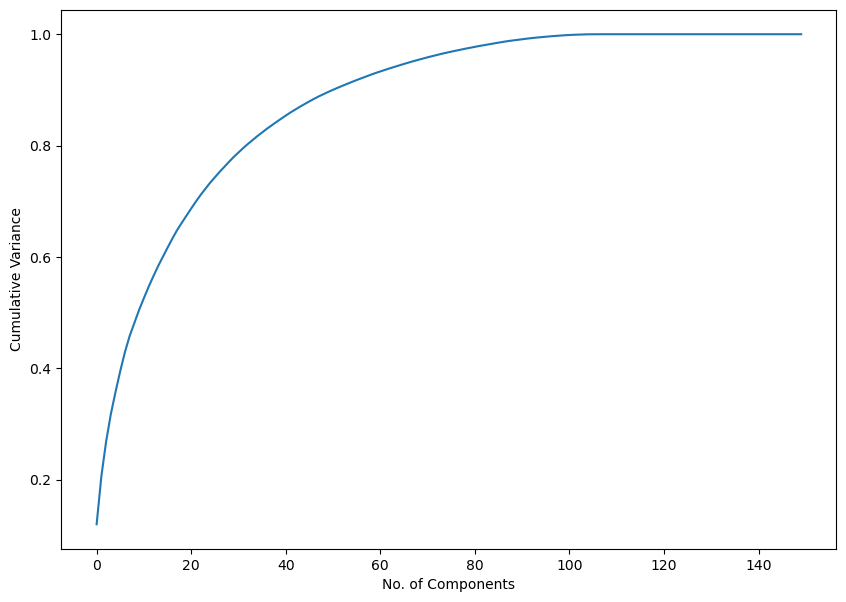

In [67]:
#Let's plot this out to understand better

fig = plt.figure(figsize = (10,7))
plt.plot(var_cum)
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Variance')

#### So, as we can see, **40 components** are enough to explain more than 90% of data.
<br> We will now perform **PCA with 40 components**.

In [68]:
# Performing PCA with 40 components

pca_40 = IncrementalPCA(n_components = 40)

#Fitting-transforming X_train

X_train_pca = pca_40.fit_transform(X_train)

In [69]:
# Now, transforming X_test

X_test_pca = pca_40.transform(X_test)


## Logistic Regression With PCA

Now, we will conduct **logistic regression with PCA**.
<br> We will also **create a confusion matrix** in order to get the True Positives and not miss a False Negative (churner), as per our biz problem.
<br> So, we will **focus on 'Recall' more than Accuracy**, as it will help us understand how our model actually identifies churners.

In [70]:
# Let's create KFold with 5 splits

folds = KFold(n_splits = 5, shuffle  =True, random_state = 4)

# Let's specify the parameters. 'C' over here denotes inverse of regularization strength, which means higher the C, lesser regularization

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Let's build the model, with recall as score

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring = 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score = True) 

# Now, let's fit the model

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

Now, let's **check the results of GridSearchCV**

In [71]:
#Checking results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.275001,0.019250,0.007886,0.006661,0.01,{'C': 0.01},0.892257,0.896125,0.879767,0.895717,0.889403,0.890654,0.005970,3,0.892454,0.890555,0.893255,0.889194,0.888558,0.890803,0.001813
1,0.396155,0.020064,0.006161,0.005942,0.1,{'C': 0.1},0.892020,0.896359,0.879535,0.897346,0.888709,0.890794,0.006427,2,0.892745,0.890788,0.892730,0.889602,0.888908,0.890955,0.001575
2,0.429972,0.032148,0.007937,0.006031,1,{'C': 1},0.892257,0.896359,0.880930,0.897114,0.888709,0.891074,0.005904,1,0.892164,0.890555,0.892672,0.889311,0.888733,0.890687,0.001539
3,0.488390,0.049049,0.008418,0.004597,10,{'C': 10},0.891546,0.896359,0.879767,0.896648,0.887783,0.890421,0.006257,4,0.891931,0.890438,0.892964,0.889077,0.888908,0.890664,0.001584
4,0.434033,0.019698,0.006993,0.006353,100,{'C': 100},0.891546,0.896359,0.879535,0.896415,0.888015,0.890374,0.006273,5,0.891931,0.890438,0.892964,0.889077,0.888850,0.890652,0.001597
5,0.420181,0.033504,0.008152,0.007092,1000,{'C': 1000},0.891546,0.896359,0.879535,0.896415,0.888015,0.890374,0.006273,5,0.891931,0.890438,0.892964,0.889077,0.888791,0.890640,0.001610


To better visualize, let's **plot C against train score and validation score**

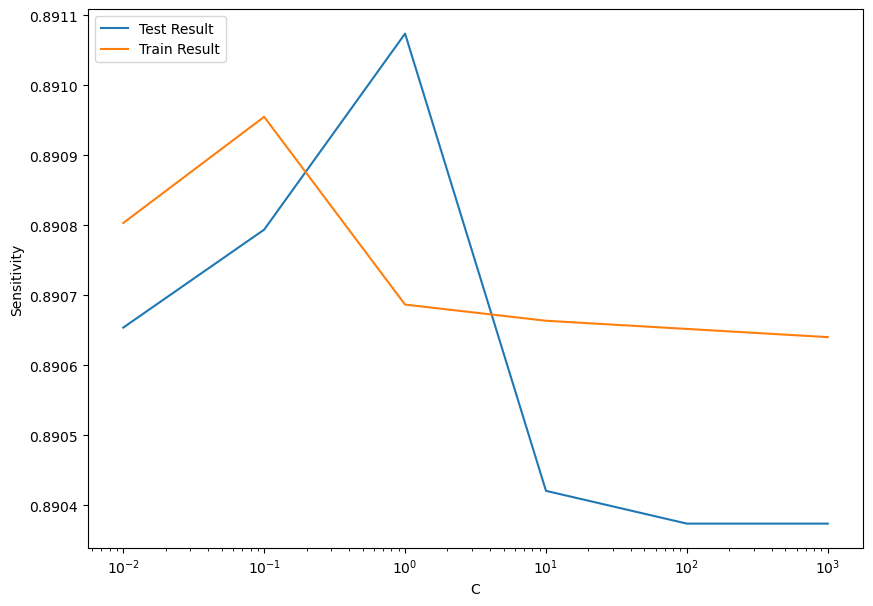

In [72]:
#Plotting C against train, validation

plt.figure(figsize=(10, 7))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(['Test Result', 'Train Result'], loc = 'upper left')
plt.xscale('log')

In [73]:
# Let's find the best score with best C

best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("Highest test sensitivity is", best_score, "at C = ", best_C)

Highest test sensitivity is 0.8910735981248203 at C =  1


As we can see, we have achieved a **test sensitivity/recall of ~89.11%**, which isn't bad for our customer churn prediction model.

Now, let's go ahead with logistic regression using the best c.

In [75]:
# Logistic regression with best_C

log_pca = LogisticRegression(C = best_C)

# Let's fit the model on train set

log_pca_model = log_pca.fit(X_train_pca, y_train)

Now, let's see the predictions on train set.

In [77]:
y_train_pred = log_pca_model.predict(X_train_pca)

#Let's check the confusion matrix

confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

#Denoting TP, TN, FP, FN

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#Finally, let's check our model's Accuracy, Sensitivity, and Specificity

print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

[[17769  3656]
 [ 2338 19087]]
Accuracy:- 0.8601166861143524
Sensitivity:- 0.8908751458576429
Specificity:- 0.8293582263710618


Alright, now let's **Predict on test set**

In [79]:
# First, let's convert dtype of y_test and y_test_pred to 'int'

y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

# Now, let's build y_test_pred model

y_test_pred = log_pca_model.predict(X_test_pca)

#Let's check confusion matrix

confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Now, let's check the Accuracy, Sensitivity, and Specificity

print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))


[[4432  916]
 [  35  158]]
Accuracy:- 0.828370330265295
Sensitivity:- 0.8186528497409327
Specificity:- 0.8287210172026926


## What we see so far:

### Train set:
1. **Accuracy:** 86.01%
2. **Sensitivity:** 89.09%
3. **Specificity** 82.94%

### Test set:
1. **Accuracy:** 82.84%
2. **Sensitivity:** 81.87%
3. **Specificity** 82.87%

So, our model is not performing too badly on our test set. 

## Logistic Regression Without PCA

Now that we have seen the results of a logistic regression model with PCA, we can **now build a Logistic Regression model without PCA** and see how that works.

In [81]:
# To begin, let's add a constant to X_train

log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

# Let's fit the model

log_no_pca = log_no_pca.fit().summary()

# Let's check summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42715
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 06 Mar 2025   Deviance:                       70920.
Time:                        11:18:34   Pearson chi2:                 3.47e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     6.576e+14   8.37e+05   7.86e+08      0.000    6.58e+14    6.58e+14
loc_og_t2o_mou           -2.055e+07      0.558  -3.68e+07      0.000   -2.05e+07   -2.05e+07
std_og_t2o_mou           -1.071e+07      0.969  -1.11e+07      0.000   -1.07e+07   -1.07e+07
loc_ic_t2o_mou           -3.464e+07      1.806  -1.92e+07      0.000   -3.46e+07   -3.46e+07
arpu_6                   -6.718e+12   7.95e+05  -8.45e+06      0.000   -6.72e+12   -6.72e+12
arpu_7                   -5.222e+12   1.06e+06  -4.93e+06      0.000   -5.22e+12   -5.22e+12
arpu_8                    1.584e+13   1.13e+06    1.4e+07      0.000    1.58e+13    1.58e+13
onnet_mou_6              -9.616e+13   5.28e+07  -1.82e+06      0.000   -9.62e+13   -9.62e+13
onnet_mou_7              -2.663e+14   3.46e+07  -7.69e+06      0.000   -2.66e+14   -2.66e+14
onnet_mou_8              -3.692e+14   2.06e+07  -1.79e+07      0.000   -3.69e+14   -3.69e+14
offnet_mou_6              3.312e+13   4.97e+07   6.67e+05      0.000    3.31e+13    3.31e+13
offnet_mou_7             -2.471e+14    3.3e+07  -7.48e+06      0.000   -2.47e+14   -2.47e+14
offnet_mou_8             -5.375e+14   2.11e+07  -2.55e+07      0.000   -5.38e+14   -5.38e+14
roam_ic_mou_6             1.983e+13   5.91e+05   3.35e+07      0.000    1.98e+13    1.98e+13
roam_ic_mou_7             6.047e+12   6.77e+05   8.93e+06      0.000    6.05e+12    6.05e+12
roam_ic_mou_8            -4.416e+12    5.9e+05  -7.48e+06      0.000   -4.42e+12   -4.42e+12
roam_og_mou_6             1.542e+13   1.66e+07   9.29e+05      0.000    1.54e+13    1.54e+13
roam_og_mou_7             9.788e+13   8.91e+06    1.1e+07      0.000    9.79e+13    9.79e+13
roam_og_mou_8             1.264e+14   5.97e+06   2.12e+07      0.000    1.26e+14    1.26e+14
loc_og_t2t_mou_6         -4.886e+17    1.2e+10  -4.07e+07      0.000   -4.89e+17   -4.89e+17
loc_og_t2t_mou_7         -4.364e+17   1.26e+10  -3.47e+07      0.000   -4.36e+17   -4.36e+17
loc_og_t2t_mou_8         -1.058e+17   1.19e+10  -8.86e+06      0.000   -1.06e+17   -1.06e+17
loc_og_t2m_mou_6         -4.958e+17   1.22e+10  -4.07e+07      0.000   -4.96e+17   -4.96e+17
loc_og_t2m_mou_7         -4.132e+17   1.19e+10  -3.47e+07      0.000   -4.13e+17   -4.13e+17
loc_og_t2m_mou_8          -1.13e+17   1.28e+10  -8.86e+06      0.000   -1.13e+17   -1.13e+17
loc_og_t2f_mou_6         -4.214e+16   1.04e+09  -4.07e+07      0.000   -4.21e+16   -4.21e+16
loc_og_t2f_mou_7         -3.641e+16   1.05e+09  -3.47e+07      0.000   -3.64e+16   -3.64e+16
loc_og_t2f_mou_8         -9.446e+15   1.05e+09  -8.96e+06      0.000   -9.45e+15   -9.45e+15
loc_og_t2c_mou_6          6.089e+12   4.57e+05   1.33e+07      0.000    6.09e+12    6.09e+12
loc_og_t2c_mou_7          -6.56e+12   4.59e+05  -1.43e+07      0.000   -6.56e+12   -6.56e+12
loc_og_t2c_mou

We will take up the process of **coarse tuning** to deal with unnecessary features. 

First, we will remove features using **Recursive Feature Elimination (RFE)**, and then move on to **manually removing features based on VIFs**.



In [84]:
# Let's begin

logreg = LogisticRegression()

In [86]:
#Let's begin RFE wih 15 features

rfe = RFE(estimator = logreg, n_features_to_select = 15)

#Let's fit the model on train set

rfe = rfe.fit(X_train, y_train)

In [87]:
# Let's check out the columns selected by RFE

rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'monthly_3g_8', 'average_rech_amt_6_7', 'action_avg_rech_num',
       'difference_rech_num', 'vbc_action_decrease'],
      dtype='object')


#### Model 1

Now, let's **create our first model** with columns selected by RFE

In [88]:
# Adding constant
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Let's fit the model
log_no_pca_1 = log_no_pca_1.fit()

#Let's check summary
log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 06 Mar 2025   Deviance:                       4793.5
Time:                        11:29:30   Pearson chi2:                 2.23e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  238.8807      2e+05      0.001      0.999   -3.91e+05    3.92e+05
og_others_7             -1.8808      2.962     -0.635      0.525      -7.686       3.924
og_others_8          -3126.7742   3.09e+05     -0.010      0.992   -6.08e+05    6.02e+05
loc_ic_t2f_mou_8        -1.0687      0.345     -3.096      0.002      -1.745      -0.392
loc_ic_mou_8            -4.0881      0.236    -17.326      0.000      -4.551      -3.626
ic_others_8             -1.5887      0.506     -3.140      0.002      -2.580      -0.597
total_rech_num_6      -431.0434    5.3e+06  -8.13e-05      1.000   -1.04e+07    1.04e+07
total_rech_num_7     -2300.9275    5.7e+06     -0.000      1.000   -1.12e+07    1.12e+07
total_rech_num_8     -2166.6701   5.37e+06     -0.000      1.000   -1.05e+07    1.05e+07
total_rech_amt_6     -1.217e+05   2.46e+08     -0.000      1.000   -4.82e+08    4.82e+08
total_rech_amt_7     -1.231e+05   2.49e+08     -0.000      1.000   -4.88e+08    4.88e+08
monthly_3g_8            -0.6581      0.114     -5.764      0.000      -0.882      -0.434
average_rech_amt_6_7  1.984e+05   4.01e+08      0.000      1.000   -7.86e+08    7.87e+08
action_avg_rech_num   4489.7855   1.06e+07      0.000      1.000   -2.08e+07    2.08e+07
difference_rech_num   -376.5104   4.63e+06  -8.13e-05      1.000   -9.07e+06    9.07e+06
vbc_action_decrease     -0.4351      0.162     -2.683      0.007      -0.753      -0.117
========================================================================================
"""

### Let's **check for VIFs** to **handle multicollinearity**

In [90]:
# Let's create a dataframe for VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,average_rech_amt_6_7,2739178.10
9,total_rech_amt_7,1054682.05
8,total_rech_amt_6,1030508.47
12,action_avg_rech_num,2013.66
5,total_rech_num_6,1439.76
13,difference_rech_num,1098.43
6,total_rech_num_7,568.08
7,total_rech_num_8,495.66
3,loc_ic_mou_8,1.41
2,loc_ic_t2f_mou_8,1.21


Okay! We have several features with **extremely high VIFs**.
<br>Let's start by **dropping them one by one** and **building new models** and see how things turn out. 

In [91]:
# First, dropping average_rech_amt_6_7

log_cols = rfe_cols.to_list()
log_cols.remove('average_rech_amt_6_7')
print(log_cols)

['og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'action_avg_rech_num', 'difference_rech_num', 'vbc_action_decrease']


#### Model 2

Now, let's build the model once again after dropping 'average_rech_amt_6_7'

In [92]:
# Adding constant 
X_train_sm_2 = sm.add_constant(X_train[log_cols])

log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Now, let's fit the model
log_no_pca_2 = log_no_pca_2.fit()

#Now, let's check summary
log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 06 Mar 2025   Deviance:                       4843.4
Time:                        11:38:38   Pearson chi2:                 2.42e+06
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.406e+05   2.02e+05      1.191      0.234   -1.55e+05    6.36e+05
og_others_7            -1.9275      2.980     -0.647      0.518      -7.767       3.912
og_others_8         -3537.3554   3.22e+05     -0.011      0.991   -6.34e+05    6.27e+05
loc_ic_t2f_mou_8       -1.0722      0.344     -3.118      0.002      -1.746      -0.398
loc_ic_mou_8           -4.1132      0.235    -17.486      0.000      -4.574      -3.652
ic_others_8            -1.6280      0.511     -3.186      0.001      -2.630      -0.627
total_rech_num_6     -4.86e+04   3.83e+06     -0.013      0.990   -7.55e+06    7.46e+06
total_rech_num_7    -4.619e+06   4.19e+06     -1.102      0.271   -1.28e+07     3.6e+06
total_rech_num_8    -4.347e+06   3.95e+06     -1.102      0.271   -1.21e+07    3.39e+06
total_rech_amt_6        0.2464      0.043      5.674      0.000       0.161       0.332
total_rech_amt_7        0.0607      0.044      1.381      0.167      -0.025       0.147
monthly_3g_8           -0.6654      0.114     -5.820      0.000      -0.889      -0.441
action_avg_rech_num  8.289e+06   6.95e+06      1.193      0.233   -5.33e+06    2.19e+07
difference_rech_num -4.246e+04   3.35e+06     -0.013      0.990    -6.6e+06    6.51e+06
vbc_action_decrease    -0.4609      0.162     -2.841      0.004      -0.779      -0.143
=======================================================================================
"""

#### VIFs For Model 2

In [93]:
# Will be similar code as earlier

vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_rech_num_6,1293.72
11,action_avg_rech_num,1062.87
12,difference_rech_num,986.52
6,total_rech_num_7,442.50
7,total_rech_num_8,379.97
8,total_rech_amt_6,1.79
9,total_rech_amt_7,1.76
3,loc_ic_mou_8,1.40
2,loc_ic_t2f_mou_8,1.21
10,monthly_3g_8,1.10


As we can see, we are **already seeing a notable difference** in the VIFs for features. 
<br> Let's **continue our modus operandi**.

In [94]:
# Removing total_rech_num_6	

log_cols.remove('total_rech_num_6')
print(log_cols)

['og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'action_avg_rech_num', 'difference_rech_num', 'vbc_action_decrease']


#### Model 3

Now, let's build the model once again after dropping 'total_rech_num_6'.

In [96]:
# Adding constant 
X_train_sm_3 = sm.add_constant(X_train[log_cols])

log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Now, let's fit the model
log_no_pca_3 = log_no_pca_3.fit()

#Now, let's check summary
log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 06 Mar 2025   Deviance:                       5143.0
Time:                        11:44:15   Pearson chi2:                 5.01e+06
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.365e+05   2.01e+05      1.175      0.240   -1.58e+05    6.31e+05
og_others_7            -2.1287      3.069     -0.694      0.488      -8.144       3.886
og_others_8         -3569.0237   3.22e+05     -0.011      0.991   -6.34e+05    6.27e+05
loc_ic_t2f_mou_8       -1.1778      0.355     -3.320      0.001      -1.873      -0.483
loc_ic_mou_8           -4.4416      0.238    -18.634      0.000      -4.909      -3.974
ic_others_8            -1.8283      0.535     -3.416      0.001      -2.877      -0.779
total_rech_num_7    -4.564e+06   3.88e+06     -1.176      0.240   -1.22e+07    3.04e+06
total_rech_num_8    -4.296e+06   3.65e+06     -1.176      0.240   -1.15e+07    2.86e+06
total_rech_amt_6        0.2335      0.042      5.530      0.000       0.151       0.316
total_rech_amt_7        0.0357      0.043      0.830      0.406      -0.049       0.120
monthly_3g_8           -0.6970      0.115     -6.068      0.000      -0.922      -0.472
action_avg_rech_num  8.149e+06   6.93e+06      1.176      0.240   -5.43e+06    2.17e+07
difference_rech_num     0.0423      0.042      1.017      0.309      -0.039       0.124
vbc_action_decrease    -0.5762      0.162     -3.556      0.000      -0.894      -0.259
=======================================================================================
"""

#### VIFs for Model 3

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,action_avg_rech_num,944.98
5,total_rech_num_7,307.07
6,total_rech_num_8,254.65
11,difference_rech_num,2.00
7,total_rech_amt_6,1.78
8,total_rech_amt_7,1.76
3,loc_ic_mou_8,1.39
2,loc_ic_t2f_mou_8,1.21
9,monthly_3g_8,1.10
12,vbc_action_decrease,1.07


In [98]:
# Removing action_avg_rech_num	

log_cols.remove('action_avg_rech_num')
print(log_cols)

['og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'difference_rech_num', 'vbc_action_decrease']


#### Model 4

Now, let's build the model once again after dropping 'action_avg_rech_num'.

In [101]:
# Adding constant 
X_train_sm_4 = sm.add_constant(X_train[log_cols])

log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Now, let's fit the model
log_no_pca_4 = log_no_pca_4.fit()

#Now, let's check summary
log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42837
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 06 Mar 2025   Deviance:                       34104.
Time:                        11:47:11   Pearson chi2:                 1.20e+05
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -53.7355   4235.180     -0.013      0.990   -8354.536    8247.065
og_others_7            -1.8034      0.859     -2.100      0.036      -3.487      -0.120
og_others_8         -3838.0860   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
loc_ic_t2f_mou_8       -0.8671      0.073    -11.831      0.000      -1.011      -0.723
loc_ic_mou_8           -3.5710      0.056    -63.447      0.000      -3.681      -3.461
ic_others_8            -1.5986      0.124    -12.931      0.000      -1.841      -1.356
total_rech_num_7        0.4289      0.023     18.694      0.000       0.384       0.474
total_rech_num_8       -0.8350      0.025    -33.965      0.000      -0.883      -0.787
total_rech_amt_6        0.3012      0.020     15.266      0.000       0.263       0.340
total_rech_amt_7        0.0696      0.019      3.632      0.000       0.032       0.107
monthly_3g_8           -0.9306      0.041    -22.958      0.000      -1.010      -0.851
difference_rech_num     0.1023      0.019      5.323      0.000       0.065       0.140
vbc_action_decrease    -1.7318      0.069    -25.108      0.000      -1.867      -1.597
=======================================================================================
"""

#### VIFs for Model 4

In [103]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range (X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,total_rech_num_8,2.54
5,total_rech_num_7,2.47
10,difference_rech_num,2.00
7,total_rech_amt_6,1.78
8,total_rech_amt_7,1.76
3,loc_ic_mou_8,1.30
2,loc_ic_t2f_mou_8,1.21
9,monthly_3g_8,1.09
11,vbc_action_decrease,1.06
1,og_others_8,1.05


Alright! We now have **VIF scores less than 3**, which is pretty good.
<br>However, we still have a couple features with **p-values higher than 0.05**.
<br>So, let's **drop them one by one**, starting with **'og_others_8'**, which has p-value of 0.990.

In [104]:
# Removing og_others_8	

log_cols.remove('og_others_8')
print(log_cols)

['og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'ic_others_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'monthly_3g_8', 'difference_rech_num', 'vbc_action_decrease']


#### Model 5

Now, let's build the model once again after dropping 'og_others_8'.

In [106]:
# Adding constant

X_train_sm_5 = sm.add_constant(X_train[log_cols])

log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family = sm.families.Binomial())

#Let's fit the model
log_no_pca_5 = log_no_pca_5.fit()

#Now, let's check summary
log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42838
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17095.
Date:                Thu, 06 Mar 2025   Deviance:                       34190.
Time:                        11:58:02   Pearson chi2:                 1.20e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4448
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0329      0.027    -38.044      0.000      -1.086      -0.980
og_others_7            -2.2755      0.773     -2.944      0.003      -3.790      -0.761
loc_ic_t2f_mou_8       -0.8693      0.073    -11.853      0.000      -1.013      -0.726
loc_ic_mou_8           -3.5700      0.056    -63.476      0.000      -3.680      -3.460
ic_others_8            -1.5978      0.124    -12.927      0.000      -1.840      -1.356
total_rech_num_7        0.4290      0.023     18.742      0.000       0.384       0.474
total_rech_num_8       -0.8368      0.025    -34.096      0.000      -0.885      -0.789
total_rech_amt_6        0.3004      0.020     15.262      0.000       0.262       0.339
total_rech_amt_7        0.0681      0.019      3.561      0.000       0.031       0.106
monthly_3g_8           -0.9288      0.041    -22.923      0.000      -1.008      -0.849
difference_rech_num     0.1022      0.019      5.322      0.000       0.065       0.140
vbc_action_decrease    -1.7325      0.069    -25.128      0.000      -1.868      -1.597
=======================================================================================
"""

As, we can see, our **p-values are handled as all are below 0.05**.
<br>Let's **check VIFs now**.

#### VIFs For Model 5

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,total_rech_num_8,2.54
4,total_rech_num_7,2.47
9,difference_rech_num,2.00
6,total_rech_amt_6,1.78
7,total_rech_amt_7,1.76
2,loc_ic_mou_8,1.30
1,loc_ic_t2f_mou_8,1.21
8,monthly_3g_8,1.09
10,vbc_action_decrease,1.06
3,ic_others_8,1.01


As we can see, our VIFs are below 3.
<br>So, we can consider **Model 5**/**log_no_pca_5** as our **FINAL MODEL**.

Now, let's check how our model **performs on the train set**. 

In [108]:
# Checking the predicted values

y_train_pred_no_pca = log_no_pca_5.predict(X_train_sm_5)
y_train_pred_no_pca.head()

0    2.309016e-01
1    1.774455e-01
2    7.884446e-02
3    8.433873e-03
4    5.229876e-20
dtype: float64

Let's create a dataframe for better readability.

In [109]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

# Let's add Customer ID for each record, making it the index as well
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.309016e-01,0
1,0,1.774455e-01,1
2,0,7.884446e-02,2
3,0,8.433873e-03,3
4,0,5.229876e-20,4


Now, let's go ahead and find the **optimal cutoff point** for Probability.

In [110]:
# Let's create columns for probablity cutoffs
prob_cut = [float(p/10) for p in range(10)]

for i in prob_cut:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.309016e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,1.774455e-01,1,1,1,0,0,0,0,0,0,0,0
2,0,7.884446e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,8.433873e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,5.229876e-20,4,1,0,0,0,0,0,0,0,0,0


Alright! Now, let's go ahead and **calculate accuracy, sensitivity, specificity** for probability cutoffs.

In [111]:
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in prob_cut:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i] =[i, accuracy, sensitivity, specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.726908     0.980957     0.472859
0.2          0.2  0.765484     0.962194     0.568775
0.3          0.3  0.790035     0.939697     0.640373
0.4          0.4  0.809498     0.912765     0.706231
0.5          0.5  0.819977     0.874772     0.765181
0.6          0.6  0.820047     0.815029     0.825064
0.7          0.7  0.811669     0.737176     0.886161
0.8          0.8  0.769895     0.595193     0.944597
0.9          0.9  0.562450     0.135636     0.989265


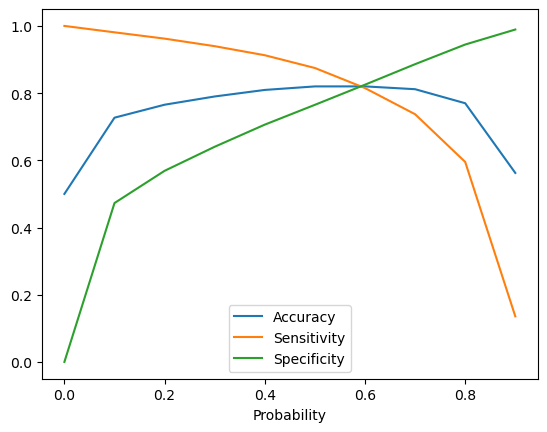

In [112]:
#Now, let's go ahead and plot the data above

cutoff_df.plot('Probability', ['Accuracy','Sensitivity','Specificity'])
plt.show()

### What we can see:
1. **Accuracy** is becoming stable at around 0.6.
2. **Sensitivity** decreases as probabilty increases.
3. **Specificity** increases as probability increases.

All parameters are intersecting at 0.6. 
<br>However, since the business problem we are dealing with is all about **identifying churning customers**, we should **stress on minimising false negatives**.
<br>So, we should ideally go a **little lower than 0.6**, best to **go with 0.5 as the optimal cutoff point**. 

In [115]:
#Let's create a 'Predicted' column with 0.5 cutoff

y_train_pred_final['Predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
0,0,2.309016e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,1.774455e-01,1,1,1,0,0,0,0,0,0,0,0,0
2,0,7.884446e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,8.433873e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,5.229876e-20,4,1,0,0,0,0,0,0,0,0,0,0


In [116]:
#Let's check confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['Predicted'])
print(confusion)

[[16394  5031]
 [ 2683 18742]]


In [118]:
# Let's caluclate Accuracy, Sensitivity, and Specificity

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['Predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8199766627771296
Sensitivity:- 0.8747724620770129
Specificity:- 0.7651808634772462


#### Let's plot ROC Curve

In [119]:
# Plotting ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

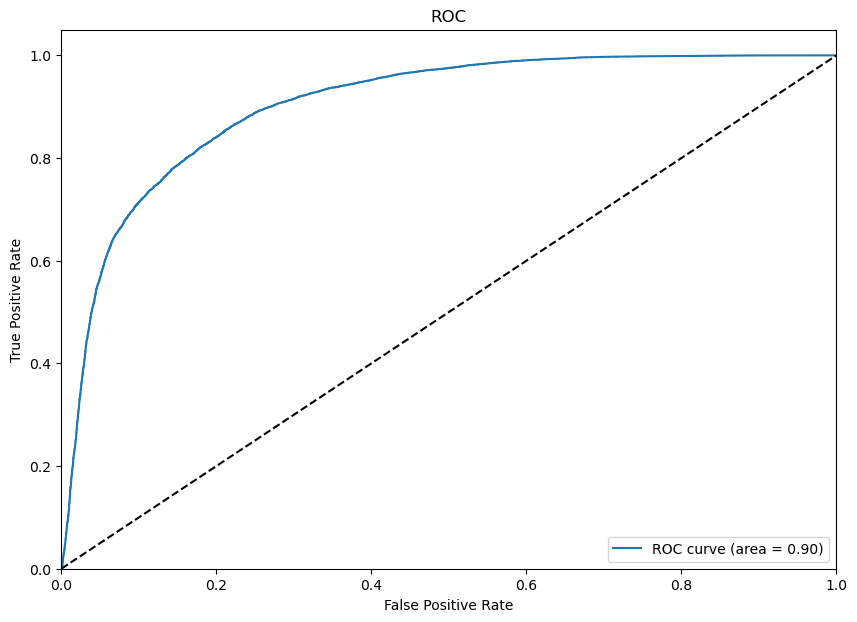

In [120]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

As we can see, the **area of ROC curve is close to 1**.

## Model Testing

Let's now test **Model 5/log_no_pca_5** on our test dataset.

In [123]:
# First, let's make a copy of the test set

X_test_log = X_test.copy()

# Now, let's take the finalised set of columns

X_test_log = X_test_log[log_cols]

In [124]:
# Adding constant

X_test_sm = sm.add_constant(X_test_log)

In [125]:
#Predicting on test set

y_test_pred = log_no_pca_5.predict(X_test_sm)
y_test_pred.head()

5704     0.046159
64892    0.030288
39613    0.449023
93118    0.028505
81235    0.031484
dtype: float64

In [126]:
#Let's convert to a DataFrame

y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
5704,0.046159
64892,0.030288
39613,0.449023
93118,0.028505
81235,0.031484


In [128]:
#Also, let's convert y_test to a DataFrame

y_test_df = pd.DataFrame(y_test)

#Let's label index
y_test_df['CustID'] = y_test_df.index

y_test_df.head()

,churn,CustID
5704,0,5704
64892,0,64892
39613,0,39613
93118,0,93118
81235,0,81235


In [130]:
# Removing index from y_pred_df and y_test_df and then concatenating them

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_test_pred_fin = pd.concat([y_test_df, y_pred_df], axis=1)
y_test_pred_fin.head()

,churn,CustID,0
0,0,5704,0.046159
1,0,64892,0.030288
2,0,39613,0.449023
3,0,93118,0.028505
4,0,81235,0.031484


In [132]:
# Some more renaming and relabelling. Changing 0 to churn_prob and rearranging them for easier comprehension.

y_test_pred_fin = y_test_pred_fin.rename(columns={0:'churn_prob'})
y_test_pred_fin = y_test_pred_fin.reindex(['CustID','churn','churn_prob'], axis=1)

#Let's check if it worked
y_test_pred_fin.head()

,CustID,churn,churn_prob
0,5704,0,0.046159
1,64892,0,0.030288
2,39613,0,0.449023
3,93118,0,0.028505
4,81235,0,0.031484


Let's simplify this further. Since we decided to go ahead with 0.5 as the cutoff, let's reflect the same on our dataframe as well!

In [136]:
y_test_pred_fin['Test_Predicted'] = y_test_pred_fin['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_fin.head(20)

,CustID,churn,churn_prob,Test_Predicted
0,5704,0,0.046159,0
1,64892,0,0.030288,0
2,39613,0,0.449023,0
3,93118,0,0.028505,0
4,81235,0,0.031484,0
5,66012,0,0.369526,0
6,91946,0,0.729289,1
7,71379,0,0.000005,0
8,81437,0,0.000399,0
9,23383,0,0.006673,0


As we can see, **customers with churn probablity** of **over 0.5** are now **marked with 1**, otherwise **0**.

In [138]:
# Let's check the confusion matrix

confusion = metrics.confusion_matrix(y_test_pred_fin['churn'], y_test_pred_fin['Test_Predicted'])
print(confusion)

[[4048 1300]
 [  37  156]]


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test_pred_fin['churn'], y_test_pred_fin['Test_Predicted']))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.7587078144739217
Sensitivity: 0.8082901554404145
Specificity: 0.7569184741959611


## What we see:

### Train set:
1. **Accuracy:** 81.99%
2. **Sensitivity:** 87.47%
3. **Specificity** 76.52%

### Test set:
1. **Accuracy:** 75.87%
2. **Sensitivity:** 80.83%
3. **Specificity** 75.69%

So, our model is not performing too badly on our test set. 

#### To recall, our model with PCA generated these results:

### Train set:
1. **Accuracy:** 86.01%
2. **Sensitivity:** 89.09%
3. **Specificity** 82.94%

### Test set:
1. **Accuracy:** 82.84%
2. **Sensitivity:** 81.87%
3. **Specificity** 82.87%

#### **Conclusion on model choice:**
As we can see, based on **performance on test set**, the **sensitivity of the PCA model is slightly better** than **model without PCA** (81.87% vs. 80.83%).  

Since **sensitivity (recall) is our priority**, we should **choose Logistic Regression with PCA**, as it **captures more churn cases both in training and testing**.

## **Business Recommendations**

#### _These are the top features:_
1. **Number of recharges in August** (*total_rech_num_8*)
2. **Number of recharges in July** (*total_rech_num_7*)
3. **Difference in recharge count over months** (*difference_rech_num*)
4. **Total recharge amount in June** (*total_rech_amt_6*)
5. **Total recharge amount in July** (*total_rech_amt_7*)
6. **Local incoming call minutes in August** (*loc_ic_mou_8*)
7. **Local incoming calls to fixed lines in August** (*loc_ic_t2f_mou_8*)
8. **Monthly 3G usage in August** (*monthly_3G_8*)
9. **Decrease in volume-based data charges** (*vbc_action_decrease*)
10. **Incoming calls from other operators in August** (*ic_others_8*)
11. **Outgoing calls to other operators in July** (*og_others_7*)

#### _Top recommendations:_ 
**Personalized Retention Offers:** Customers reducing recharges may be churning. Offer them discounts or bonus data for continued engagement.
<br>**Recharge Consistency Plans:** Encourage customers to maintain regular recharges by offering loyalty points or free add-ons.
<br>**Early Warning System:** Flag customers whose recharge numbers are dropping sharply for proactive retention efforts.
<br>**High-Value Customer Retention:** If high-spending customers are reducing recharge amounts, offer exclusive discounts or premium customer service.
<br>**Price Sensitivity Analysis:** Test new pricing structures or promotions to prevent further decline in spending.
<br>**Call Usage Trends:** Customers with decreasing incoming calls might be shifting to other networks. Offer better call quality or free incoming call packs.
<br>**Enterprise & Business Solutions:** If business users are reducing calls to fixed lines, promote VoIP solutions or bundled corporate plans.
<br>**Data Upsell Campaigns:** Encourage customers with declining 3G usage to switch to 4G with discounts or better plans.
<br>**Push Data Packs:** If customers are moving away from pay-per-use data, upsell unlimited data packs.
<br>**Competitor Influence Check:** If more calls are from other networks, competitors might be attracting customers. Counter this with competitive offers.
<br>**Inter-Operator Retention Strategy:** Offer better call rates for cross-network calls to reduce churn risk.

#### _TOP 5 Recommended Business Actions_

1. **Develop a churn prevention model** based on declining recharge frequency, recharge amount, and data usage patterns.
2. **Launch proactive retention offers** for customers showing early signs of churn.
3. **Analyze competitor influence based on incoming/outgoing call trends** to other operators.
4. **Segment high-value customers (based on recharge amount)** and provide personalized incentives.
5. **Encourage prepaid customers to switch to postpaid plans** for better customer stickiness.